Text(0.5, 1.0, 'identify boney st.')

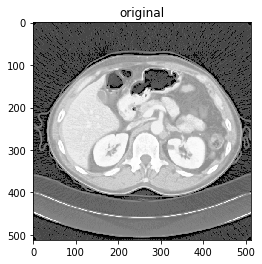

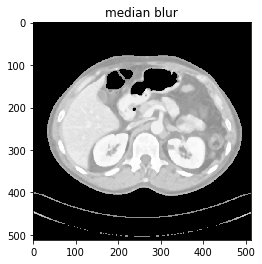

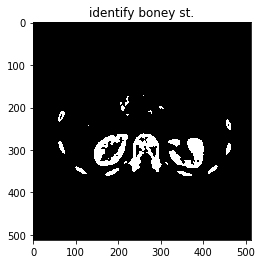

In [118]:
import pydicom
import cv2
import PIL
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
im=pydicom.dcmread('dicom_dir/ID_0013_AGE_0060_CONTRAST_1_CT.dcm')
photo=np.array(im.pixel_array)
photo=np.uint8(cv2.normalize(photo, None, 0, 255, cv2.NORM_MINMAX))
photo=cv2.equalizeHist(photo)
image_new=PIL.Image.frombytes('L',
                          (photo.shape[1],photo.shape[0]), photo.astype('b').tostring())
image=np.asarray(image_new)
plt.figure(0)
plt.imshow(image, cmap='gray')
plt.title("original")
#histr = cv2.calcHist([image],[0],None,[256],[0,256]) 
#plt.plot(histr)
kernel = np.ones((5,5),np.uint8)
blur=cv2.medianBlur(image,5)
blur[blur<140]=0
plt.figure(2)
plt.imshow(blur, cmap='gray')
plt.title("median blur")
ret, thresh1 = cv2.threshold(blur, 243, 255,cv2.THRESH_BINARY)
plt.figure(4)
plt.imshow(thresh1, cmap='gray')
plt.title("identify boney st.")
#opening=cv2.erode(cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, kernel),kernel, iterations=1)
#plt.figure(5)
#plt.imshow(opening, cmap='gray')

Text(0.5, 1.0, 'remove boney st.')

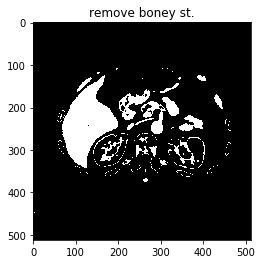

In [150]:
gimic=blur.copy()
gimic[gimic<220]=0
gimic[thresh1>0]=0
ret, thresh = cv2.threshold(gimic, 0, 255,cv2.THRESH_BINARY)
plt.imshow(thresh,cmap='gray')
plt.title("remove boney st.")

Text(0.5, 1.0, 'connected components')

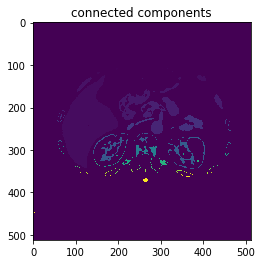

In [149]:
ret,markers= cv2.connectedComponents(thresh)
plt.imshow(markers)
plt.title("connected components")

71.74


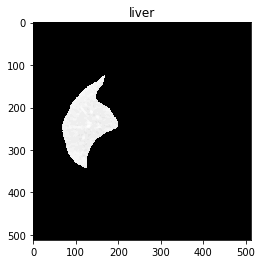

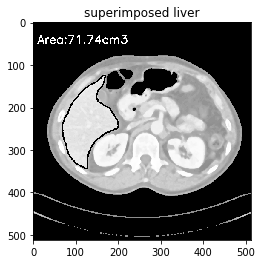

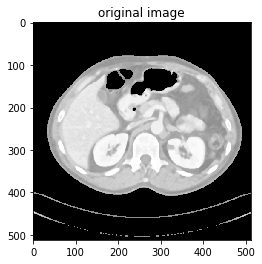

In [178]:
maker=[np.sum(markers==m) for m in range(np.max(markers)) if m!=0]
large=np.argmax(maker)+1
mask=markers==large
brin=blur.copy()
brin[mask==False]=0

new=cv2.medianBlur(brin,3)
plt.figure(0)
plt.imshow(new,cmap='gray')
plt.title("liver")

kernel = np.ones((2,2),np.uint8)
gradient = cv2.morphologyEx(new, cv2.MORPH_GRADIENT, kernel)

contours = cv2.findContours(gradient, cv2.RETR_EXTERNAL,
                            cv2.CHAIN_APPROX_NONE)[1]
out=blur.copy()
cv2.drawContours(out, contours, -1,(0,0,255), thickness = 2)
contour= max(contours, key=cv2.contourArea)
area=cv2.contourArea(contour)*im['SliceThickness'].value*0.001
cv2.putText(out,'Area:'+str(area)+'cm3',(10,50),
             cv2.FONT_HERSHEY_SIMPLEX,0.9,(255,255,255),2)
plt.figure(1)
plt.imshow(out,cmap='gray')
plt.title("superimposed liver")
plt.figure(2)
plt.imshow(blur,cmap='gray')
plt.title("original image")

print(area)